<a href="https://colab.research.google.com/github/AlbericoJose/Coleta-e-Analise/blob/main/Plano_Sa%C3%BAde_Des%C3%A1fio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
import pandas as pd

# **Coleta de Dados dos Estados**

In [ ]:
estados = pd.read_csv('/content/estados_brasileiros.csv', sep = ';', encoding='latin-1')

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


# **Coleta de Dados dos Clientes**

In [ ]:
dados_clientes = pd.read_excel('/content/dados_clientes.xlsx')
dados_clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


# **Coletando Dados das idades dos Clientes**

In [ ]:
idade_clientes = pd.read_csv('/content/idade_clientes.csv', sep = ';', encoding='latin-1')
idade_clientes.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


# **Preparação dos Dados**

Limpeza dos Dados

In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
idade_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


# **Verificar Dados Ausentes**

In [ ]:
# valores ausentes/nulos na base
estados.isna().sum() # Questão 2

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
dados_clientes.isna().sum() # Questão 2

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade_clientes.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
# valores nulos
dados_clientes.loc[dados_clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


# **Eliminar Dados Ausentes**

In [ ]:
#dados_clientes.dropna(subset=['peso'], inplace=True) # Questão 3

In [ ]:
dados_clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
dados_clientes.count()

id_cliente    547
peso          542
colesterol    547
genero        547
id_estado     547
dtype: int64

In [ ]:
dados_clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
#estados.dropna(subset=['pais'], inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [ ]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
# Média
media = dados_clientes.peso.mean()
media

143.4409594095941

In [ ]:
# arredondamento Média
round(media,2)

143.44

In [ ]:
# Mediana
mediana = dados_clientes.peso.median() #Questão 1
mediana

140.0

In [ ]:
# Preencher valores ausentes pela média
dados_clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
dados_clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
dados_clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

# **Variável Categórica**

Substituir os valores ausentes pela variável categórica mais frequente encontrada no conjunto de dados

In [ ]:
print(estados.pais.value_counts())

Brasil    22
Name: pais, dtype: int64


In [ ]:
estados.pais.fillna('Brasil', inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# **Distribuição dos Dados**

In [ ]:
import matplotlib.pyplot as plt

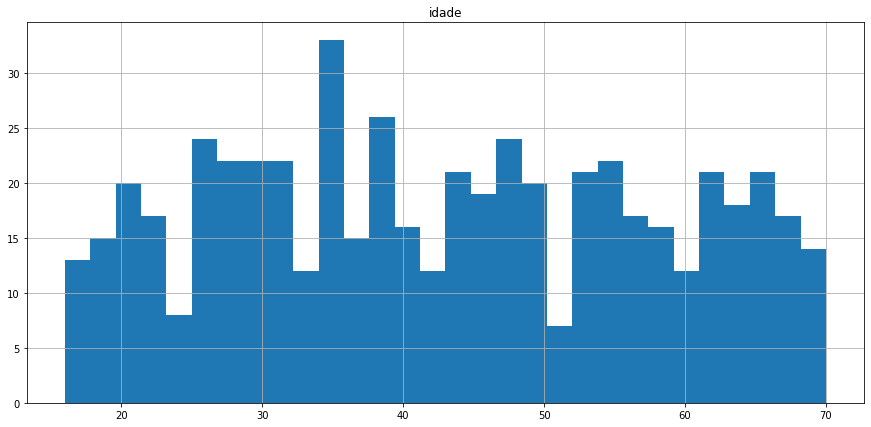

In [ ]:
# Histograma baseado na idade dos clientes
idade_clientes.hist(column='idade', figsize=(15,7), bins=30) # Questão 4
plt.show()

In [ ]:
dados_clientes

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
...,...,...,...,...,...
542,543,172.0,207,Masculino,22
543,544,129.0,157,Masculino,1
544,545,107.0,115,Masculino,6
545,546,117.0,147,Masculino,20


In [ ]:
# Criar um identifiador para a variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dados_clientes['genero_number'] = LE.fit_transform(dados_clientes['genero'])

In [ ]:
dados_clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


# **Junção Entre os Dados Coletados**

Realizar o Merge entre os dados

In [ ]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [ ]:
dados_clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
idade_clientes[:5]

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [ ]:
estados_clientes = pd.merge(dados_clientes, estados, on='id_estado')
estados_clientes.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
# Merge de estados_clientes com idade_clientes
base_completa = pd.merge(estados_clientes, idade_clientes, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
# Ordenar o indíce
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
543,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
544,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
545,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


# **Organizando a Base de Dados**

In [ ]:
# Alterar nome das Colunas
base_completa.rename(columns={'id_cliente' : 'cod_cliente', 'genero_number' : 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
# Colocar as siglas dos estados em maíuscula
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SC
87     SE
       ..
443    RO
478    AC
178    CE
396    RN
123    ES
Name: sigla_estado, Length: 547, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [ ]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


# **Alterando Disposição das Colunas**

Ordenar as Colunas de Forma que melhore a Visualização dos Dados

In [ ]:
base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
65,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
87,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
478,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
178,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
396,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']].reset_index(drop=True)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# **Análise dos Dados**

Aplica método cotovelo e identificando o número de clusters necessário para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_clientes):
    wcss = []
    for k in range(1,11):
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(X=dados_clientes)
      wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_clientes = base_completa[['peso', 'colesterol']]
dados_clientes.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158


In [ ]:
wcss_cliente = calcular_wcss(dados_clientes)

In [ ]:
type(wcss_cliente)

list

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_cliente)):
     print(f'O cluster {i} possui valor de wcss: {wcss_cliente[i]}')

O cluster 0 possui valor de wcss: 1351189.92514808
O cluster 1 possui valor de wcss: 332506.94869457965
O cluster 2 possui valor de wcss: 142760.59788555026
O cluster 3 possui valor de wcss: 83603.35997196392
O cluster 4 possui valor de wcss: 56003.84488440168
O cluster 5 possui valor de wcss: 39769.32869961483
O cluster 6 possui valor de wcss: 29789.831589453403
O cluster 7 possui valor de wcss: 24130.71784475827
O cluster 8 possui valor de wcss: 19211.101161282262
O cluster 9 possui valor de wcss: 16653.1580670131


# **Visualizar Gráfico Cotovelo**

In [ ]:
import plotly.express as px # criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Criação e concatenação de gráficos

In [ ]:
grafico_wcss = px.line(x= range(1,11),
                       y=wcss_cliente
                       )
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o wcss',
                  xaxis_title='Número de clusters',
                  yaxis_title='valor do wcss',
                  template='plotly_dark'
                  )
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_clientes)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3
...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3


# **Cálculando os centroides de cada Cluster**

In [ ]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[183.99633987, 218.96732026],
       [106.85      , 119.53571429],
       [151.99428571, 186.11764706],
       [127.88474074, 154.38518519]])

In [ ]:
dados_clientes

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158
...,...,...
542,172.0,207
543,129.0,157
544,107.0,115
545,117.0,147


In [ ]:
grafico = px.scatter(x = dados_clientes['peso'],
                     y = dados_clientes['colesterol'],
                     color = base_completa['cluster']
                     

                    )
grafico_centroide = px.scatter(x = centroides_cluster[:,0], y = centroides_cluster[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# **Melhorando o Layout**

In [ ]:
grafico =px.scatter(x = base_completa['colesterol'],
                    y = base_completa['peso'],
                    color = base_completa['cluster'])
fig = go.Figure(grafico)
fig.update_layout(title = 'Analise de Clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'Peso')
fig.show()

# **Função para Gerar Gráficos**

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title = 'Analise de Clustes',
                    xaxis_title = xlabel,
                    yaxis_title = y_label)
  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

# **Segmentando os Clientes baseado na Análise dos clusters**

1-Alto Risco

2-Risco Moderado Alto

3-Risco Moederado Baixo

4-Baixo Risco

In [ ]:
x = 'colesterol' # Questão 13
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [ ]:
cluster_clientes = base_completa

In [ ]:
# Seguimentando os clientes baseado na análise dos clusters
# cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado baixo'
# cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Risco Moderado alto'
# cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Alto Risco'
# cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Risco Moderado alto'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'

In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3,Risco Moderado baixo
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3,Risco Moderado baixo
...,...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3,Risco Moderado baixo
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1,Baixo Risco
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3,Risco Moderado baixo


In [ ]:
media_cluster = cluster_clientes.idade.mean()
round(media_cluster)

43

In [ ]:
peso_colesterol = cluster_clientes[['peso', 'colesterol']]
peso_colesterol

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158
...,...,...
542,172.0,207
543,129.0,157
544,107.0,115
545,117.0,147


# **Análise dos Clusters Criados**

In [ ]:
# verificando os valores de peso por cluster # Questão 9
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,153.0,183.996340,10.298541,143.44,176.00,183.0,191.0,203.00
Baixo Risco,140.0,106.850000,6.168993,95.00,101.75,107.0,112.0,118.00
Risco Moderado alto,119.0,151.994286,6.993227,140.00,146.00,152.0,157.0,169.00
Risco Moderado baixo,135.0,127.884741,7.121337,115.00,122.00,128.0,134.0,143.44


In [ ]:
# verificando os valores de colesterol por cluster # Questão 9
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,153.0,218.967320,8.192116,204.0,213.0,220.0,225.00,235.0
Baixo Risco,140.0,119.535714,10.138899,102.0,110.0,120.0,128.25,138.0
Risco Moderado alto,119.0,186.117647,10.170726,168.0,177.0,188.0,194.00,211.0
Risco Moderado baixo,135.0,154.385185,9.823050,138.0,145.5,155.0,163.00,171.0


In [ ]:
centroides_cluster

array([[183.99633987, 218.96732026],
       [106.85      , 119.53571429],
       [151.99428571, 186.11764706],
       [127.88474074, 154.38518519]])

In [ ]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Distrito Federal"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
46,47,Masculino,68,183.0,218,7,Distrito Federal,DF,Brasil,0,Alto Risco
57,58,Feminino,39,170.0,208,7,Distrito Federal,DF,Brasil,0,Alto Risco
123,124,Feminino,28,192.0,228,7,Distrito Federal,DF,Brasil,0,Alto Risco
130,131,Feminino,21,183.0,213,7,Distrito Federal,DF,Brasil,0,Alto Risco
132,133,Masculino,69,173.0,208,7,Distrito Federal,DF,Brasil,0,Alto Risco
224,225,Masculino,57,176.0,212,7,Distrito Federal,DF,Brasil,0,Alto Risco
238,239,Feminino,34,195.0,231,7,Distrito Federal,DF,Brasil,0,Alto Risco
269,270,Masculino,60,168.0,211,7,Distrito Federal,DF,Brasil,0,Alto Risco
496,497,Masculino,67,200.0,228,7,Distrito Federal,DF,Brasil,0,Alto Risco


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe() # Questão 11

count        mean        std     min     25%  \
nome_cluster         genero                                                    
Alto Risco           Feminino    63.0  185.308571   9.509109  143.44  180.00   
                     Masculino   90.0  183.077778  10.773696  167.00  173.00   
Baixo Risco          Feminino    64.0  108.203125   6.335037   96.00  103.25   
                     Masculino   76.0  105.710526   5.825955   95.00  101.75   
Risco Moderado alto  Feminino    66.0  152.000000   7.287502  140.00  145.00   
                     Masculino   53.0  151.987170   6.677765  140.00  148.00   
Risco Moderado baixo Feminino    73.0  129.732055   7.247981  116.00  125.00   
                     Masculino   62.0  125.709677   6.364314  115.00  120.25   

                                  50%     75%     max  
nome_cluster         genero                            
Alto Risco           Feminino   186.0  191.50  203.00  
                     Masculino  181.5  189.75  203.00  
Baixo Risco          Feminino   109.5  113.00  118.00  
                     Masculino  105.0  110.00  118.00  
Risco Moderado alto  Feminino   154.0  157.00  169.00  
                     Masculino  151.0  154.00  168.00  
Risco Moderado baixo Feminino   130.0  135.00  143.44  
                     Masculino  125.5  131.00  140.00

In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()  #Questão 15

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    63.0  220.873016   6.459532  204.0  217.00   
                     Masculino   90.0  217.633333   9.009920  204.0  211.00   
Baixo Risco          Feminino    64.0  122.234375  10.219406  102.0  112.00   
                     Masculino   76.0  117.263158   9.557361  102.0  109.75   
Risco Moderado alto  Feminino    66.0  186.075758  10.573276  168.0  175.25   
                     Masculino   53.0  186.169811   9.746273  171.0  178.00   
Risco Moderado baixo Feminino    73.0  156.561644   9.797940  138.0  149.00   
                     Masculino   62.0  151.822581   9.290440  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  218.5  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado alto  Feminino   189.5  195.0  204.0  
                     Masculino  185.0  193.0  211.0  
Risco Moderado baixo Feminino   158.0  166.0  171.0  
                     Masculino  152.0  158.0  168.0

In [ ]:
cluster_clientes.idade.describe() # Questão 10 - Verificar se a resposta precisa ser exata.

count    547.000000
mean      42.791590
std       15.160209
min       16.000000
25%       30.000000
50%       42.000000
75%       55.000000
max       70.000000
Name: idade, dtype: float64